In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:/Excel files/tata revised data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,207.4,217.25,207.4,216.75,217.0,676126
1,04-01-2000,217.0,219.00,206.0,208.20,211.9,679215
2,05-01-2000,194.0,217.80,194.0,213.25,213.1,1120951
3,06-01-2000,215.0,229.90,215.0,222.10,222.0,1968998
4,07-01-2000,224.0,239.90,223.1,239.90,239.9,2199431


In [3]:
df.shape


(5306, 7)

In [4]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03
mean,410.152752,417.122512,402.179438,409.450264,409.451828,1.046560e+07
std,272.966475,277.018798,268.028297,272.473264,272.516903,2.185034e+07
min,58.000000,60.700000,57.550000,58.800000,58.750000,1.235100e+04
25%,174.762500,178.825000,171.012500,174.600000,174.725000,1.668994e+06
50%,378.900000,384.750000,372.600000,377.250000,377.525000,4.141648e+06
75%,523.475000,530.800000,515.912500,523.150000,523.487500,8.706037e+06
max,1361.000000,1382.000000,1347.000000,1365.150000,1362.000000,3.905778e+08


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5306 non-null   object 
 1   Open       5306 non-null   float64
 2   High       5306 non-null   float64
 3   Low        5306 non-null   float64
 4   Close      5306 non-null   float64
 5   Adj Close  5306 non-null   float64
 6   Volume     5306 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 290.3+ KB


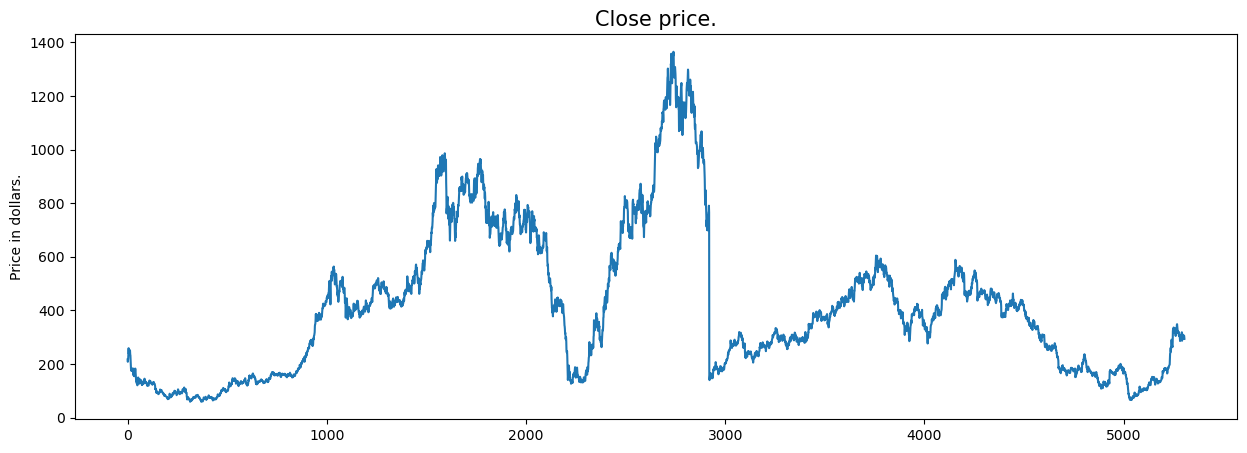

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,207.4,217.25,207.4,216.75,217.0,676126
1,04-01-2000,217.0,219.00,206.0,208.20,211.9,679215
2,05-01-2000,194.0,217.80,194.0,213.25,213.1,1120951
3,06-01-2000,215.0,229.90,215.0,222.10,222.0,1968998
4,07-01-2000,224.0,239.90,223.1,239.90,239.9,2199431


In [8]:
df[df['Close'] == df['Adj Close']].shape

(150, 7)

In [9]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

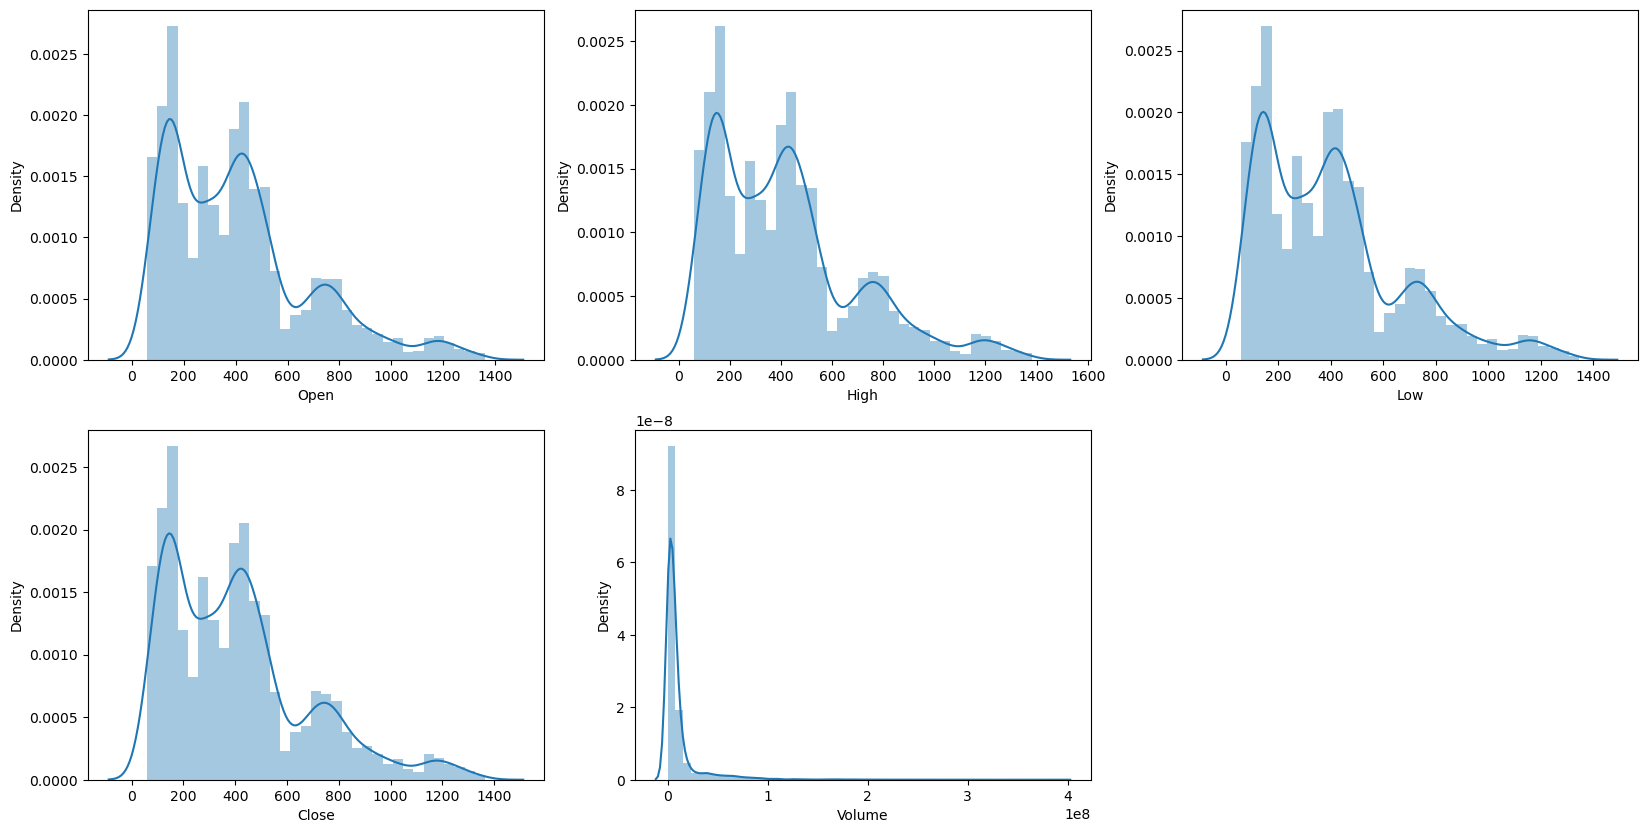

In [10]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

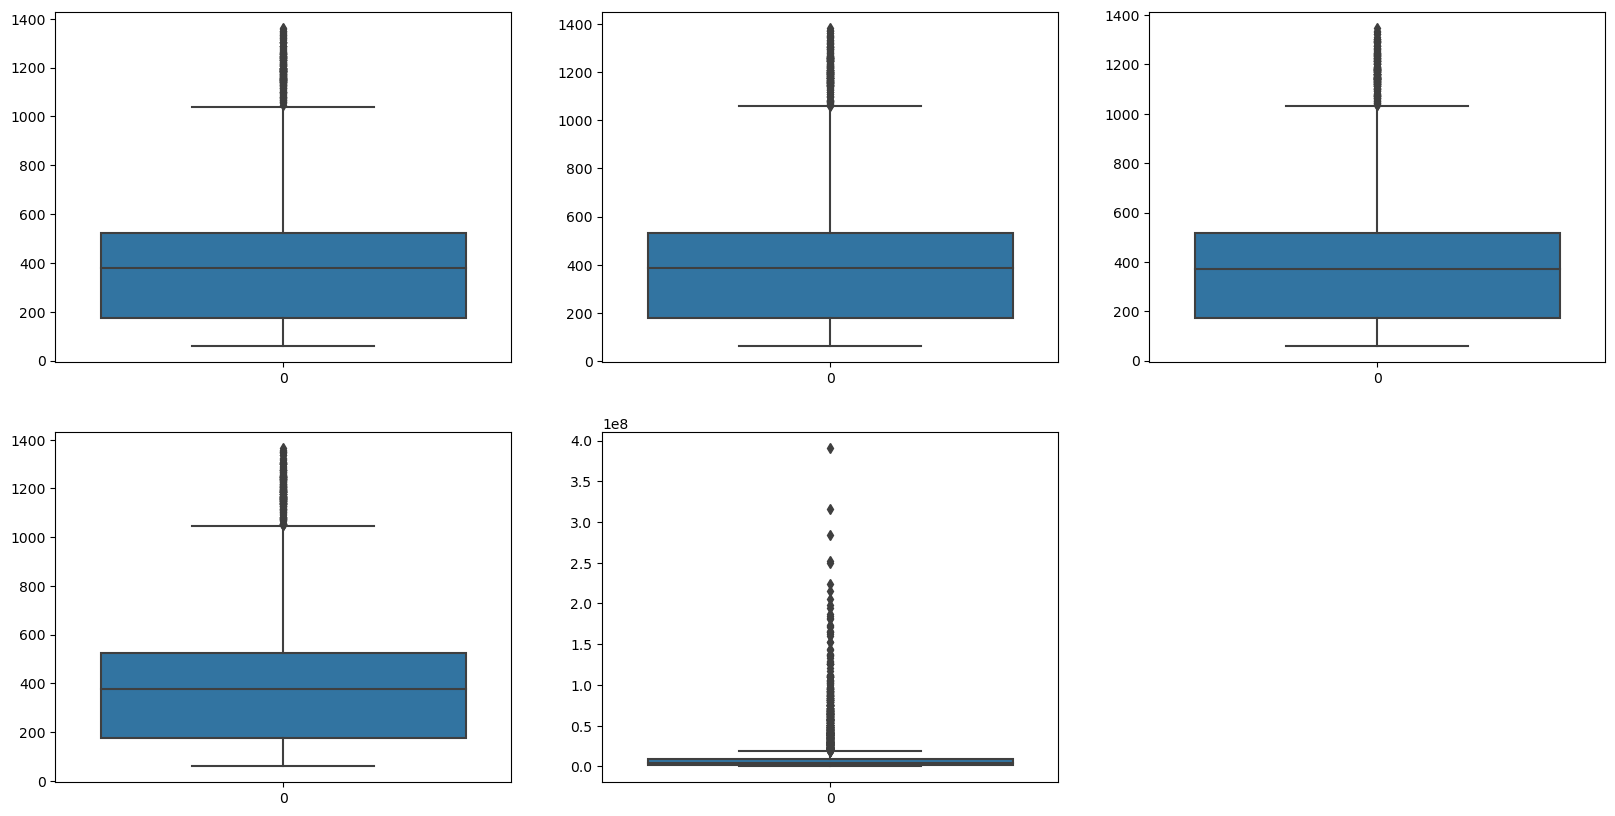

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2000-03-01,207.4,217.25,207.4,216.75,217.0,676126,1,3,2000
1,2000-04-01,217.0,219.00,206.0,208.20,211.9,679215,1,4,2000
2,2000-05-01,194.0,217.80,194.0,213.25,213.1,1120951,1,5,2000
3,2000-06-01,215.0,229.90,215.0,222.10,222.0,1968998,1,6,2000
4,2000-07-01,224.0,239.90,223.1,239.90,239.9,2199431,1,7,2000


In [13]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2000-03-01,207.4,217.25,207.4,216.75,217.0,676126,1,3,2000,1
1,2000-04-01,217.0,219.00,206.0,208.20,211.9,679215,1,4,2000,0
2,2000-05-01,194.0,217.80,194.0,213.25,213.1,1120951,1,5,2000,0
3,2000-06-01,215.0,229.90,215.0,222.10,222.0,1968998,1,6,2000,1
4,2000-07-01,224.0,239.90,223.1,239.90,239.9,2199431,1,7,2000,0


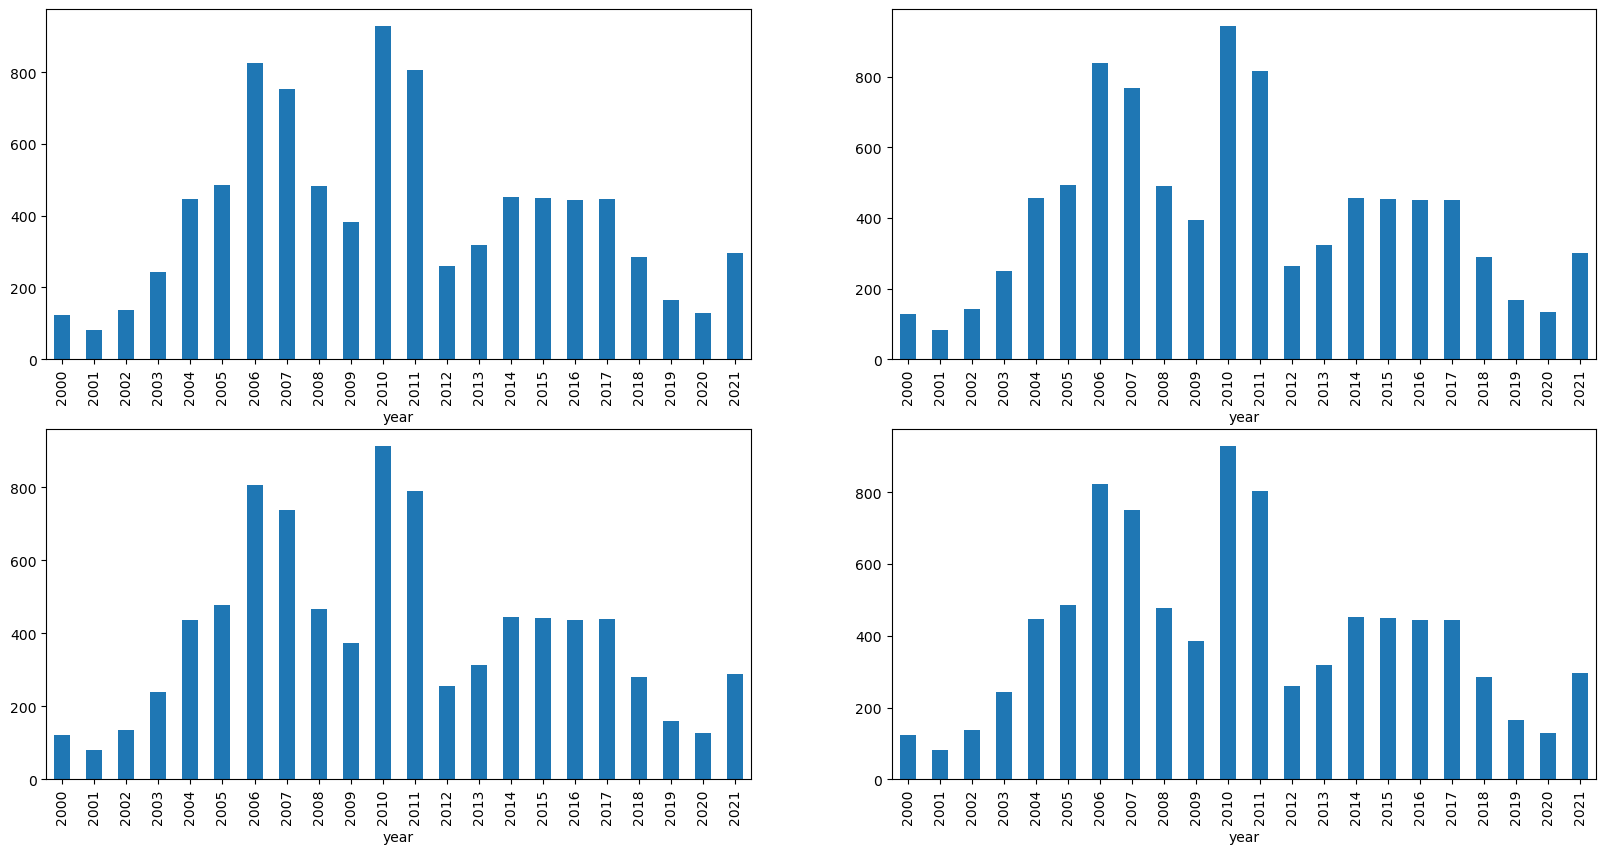

In [14]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [15]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,410.523839,417.591827,402.232960,409.651303,409.658796,1.049099e+07,15.767139,6.041643,2010.153258
1,409.415175,416.189696,402.073057,409.050676,409.040456,1.041513e+07,15.639077,7.451014,2010.104730


In [16]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


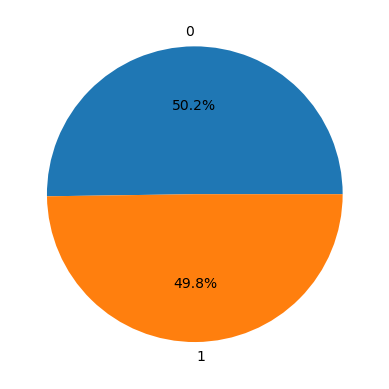

In [17]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()


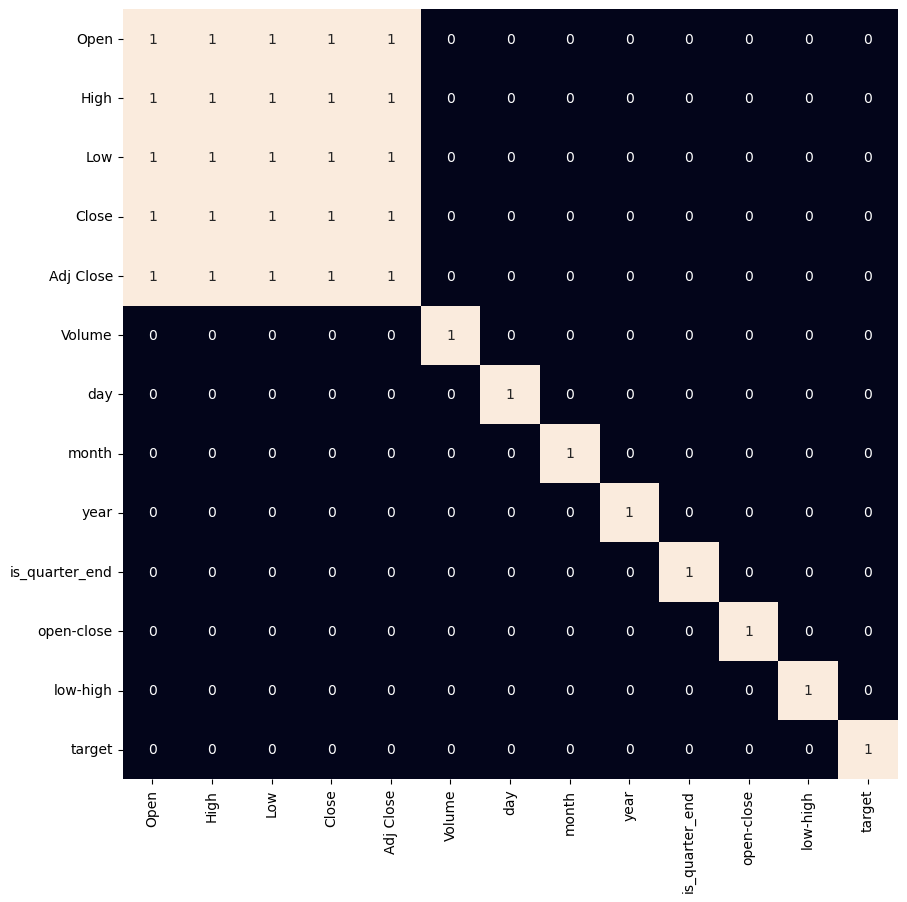

In [18]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [19]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(4775, 3) (531, 3)


In [23]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
        models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.8699798388299365
Validation Accuracy :  0.5498978491572555

